In [ ]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

In [ ]:
#Random data generation


x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

In [2]:
# Data from a csv file

from numpy import genfromtxt
my_data = genfromtxt('BMI-M.csv', delimiter=',')

In [7]:
my_data[:20]

array([[  1.74      ,  96.        ,  31.70828379],
       [  1.89      ,  87.        ,  24.35542118],
       [  1.85      , 110.        ,  32.14024836],
       [  1.95      , 104.        ,  27.35042735],
       [  1.49      ,  61.        ,  27.47623981],
       [  1.89      , 104.        ,  29.11452647],
       [  1.47      ,  92.        ,  42.57485307],
       [  1.54      , 111.        ,  46.80384551],
       [  1.74      ,  90.        ,  29.72651605],
       [  1.69      , 103.        ,  36.06316305],
       [  1.95      ,  81.        ,  21.30177515],
       [  1.59      ,  80.        ,  31.64431787],
       [  1.92      , 101.        ,  27.39800347],
       [  1.55      ,  51.        ,  21.22788762],
       [  1.91      ,  79.        ,  21.65510814],
       [  1.53      , 107.        ,  45.70891537],
       [  1.57      , 110.        ,  44.62655686],
       [  1.4       , 129.        ,  65.81632653],
       [  1.44      , 145.        ,  69.92669753],
       [  1.72      , 139.     

In [ ]:
model = lingam.DirectLiNGAM()
model.fit(my_data)

#output : <lingam.direct_lingam.DirectLiNGAM at 0x7fa126f72c10>

In [11]:
model.causal_order_


[1, 0, 2]

In [12]:
model.adjacency_matrix_

array([[  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [-45.403,   0.357,   0.   ]])

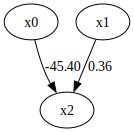

In [13]:
make_dot(model.adjacency_matrix_)

In [15]:
p_values = model.get_error_independence_p_values(my_data)
print(p_values)

[[0.    0.752 0.   ]
 [0.752 0.    0.   ]
 [0.    0.    0.   ]]
